# 1. Data and Training
**first task: train an image classifier to separate between two classes**

Work steps: 
1.  Load the training data from the provided folder (./data/train). 
    - Write a custom dataset and dataloader class that is able to load the data and later provide it for training. See this 
      Pytorch tutorial for implementation details: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html <br>

<br>

2. Test the dataloader 
    - by calling the next-function if it is working properly. The data needs to be accessed **randomly**.

<br>

3. Implement a model architecture:
     - Convolution layer (32 kernels, 5x5 kernel-size)
     - Activation layer (ReLU)
     - Max pooling layer (pooling size 2x2, stride 2)
     - Dropout layer (dropout probability 0.1)
     - Linear layer (256 neurons)
     - Activation Layer (ReLU)
     - Linear layer (2 neurons)

<br>

4. Perform a dataset normalization 
    - based on the mean and standard deviation of the dataset 
    -  Look for the normalization function in the torchvision library. The images need to be scaled from [0, 255] to [0.0, 
       1.0]. 

<br>
       
5. Train the model
    - within a training routine, using your model and the dataloader class    
    - Run the training with the following settings:

           40 epochs
           Adam-Optimizer
           Batch-size: 32
           Learning-Rate: 0.0001
           Cross Entropy loss function
    - Print the training loss every 50 iterations to the console. 
    - Print the average loss after each epoch.

# 1. Data and Training

In [1]:
# 1. Write a custom dataset and dataloader class that is able to load the data and later provide it for training 

## Dataset class: responsible for accessing and processing single instances of data 
## Dataloader class: pulls instances of data from the dataset (automatically or a sampler by my choice -> randomly), 
##                   collects them in batches, and returns them for consumption by my training loop. 

## Load packages
import os 
import pandas as pd 
import torch
from torch.utils.data import Dataset, DataLoader
from skimage import io 
from torch import nn

## Set device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Define directories 
root_dir = './data'
train_dir = './data/train'
test_dir = './data/test'


class CustomDatasetClass(Dataset):
    def __init__(self, directory, transform=None):
        # Initialize the dataset with directory and transform
        self.directory = directory # Set directory
        self.data_samples = []  # List to store image paths
        self.labels = []  # List to store labels
        self.transform = transform  # Transformations to apply to the images

        # Since ./data/train and ./data/test has two subfolders containing classes: "car" and "not_car":
        for label, class_name in enumerate(['car', 'not_car']):
            class_folder = os.path.join(directory, class_name)  # Path to class folder
            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)  # Path to image
                self.data_samples.append(image_path)  # Add image path to list
                self.labels.append(label)  # Add class label to list

    def __len__(self):
        # Return the number of samples
        return len(self.data_samples)

    def __getitem__(self, idx):
        img_path = self.data_samples[idx] # Get the image path
        label = self.labels[idx] # Get the label
        image = io.imread(img_path) # Read the image
        
        
        if self.transform:  # Apply transformations if any are specified
            image = self.transform(image)

        # Return the transformed image and its label
        return image, label

     
## Create the dataset 
train_dataset = CustomDatasetClass(directory=train_dir, transform=None)

## Define a custom dataloader class
## In my research, every site already calls this a "custom dataloader", since a custom datasetclass was set up first.
## e.g.: https://www.squash.io/creating-custom-datasets-and-dataloaders-in-pytorch/, and the official pytorch site: 
## https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html
## So I stopped trying to work something out here and I didn't just wanna copy the stuff from ChatGPT
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True) 

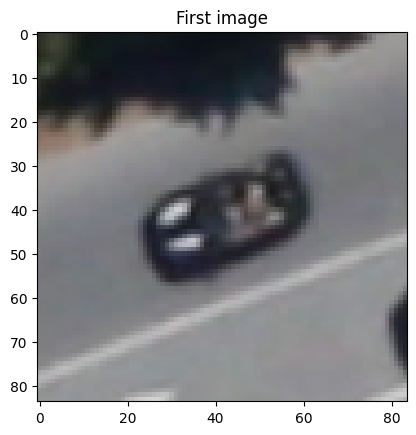

In [2]:
# Visualize first image to check if data is loaded correctly 
import matplotlib.pyplot as plt

# Load first image
first_image, first_label = train_dataset[0]

# Plot first image 
plt.imshow(first_image)
plt.title("First image")
plt.show()

In [3]:
# 2. Test the dataloader by calling the next-function (https://python-code.dev/articles/356467746)
dataloader_iterator = iter(train_dataloader)  # Create an iterator

while True:
    try:
        # Get the next batch
        images, labels = next(dataloader_iterator) 
        # Process the batch
        print("Batch size:", images.size())
        print("Labels size:", labels.size())
        # ...
    except StopIteration:
        break # Reached the end of the DataLoader

Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Si

Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([32, 84, 84, 3])
Labels size: torch.Size([32])
Batch size: torch.Size([8, 84, 84, 3])
Labels size: torch.Size([8])


In [4]:
# 3. Implement a model architecture
from torch import nn

from torch import nn
import torch

class CNN_Model(nn.Module):
    def __init__(self, number_of_classes):
        super(CNN_Model, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)  # 1. Convolutional Layer
        self.relu1 = nn.ReLU()  # 2. ReLu activation
        self.max_pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)  # 3. Max Pooling
        self.dropout1 = nn.Dropout(p=0.1)  # 4. Dropout
        
   #     self._to_linear = None
   #     self._initialize_linear_layer()

        self.linear1 = nn.Linear(51200, 256)  # 5. Linear Layer
        self.relu2 = nn.ReLU()  # 6. ReLu activation
        self.linear2 = nn.Linear(256, number_of_classes)  # 7. Output linear layer

 #   def _initialize_linear_layer(self):
        # Create a dummy variable to find out the output dimension
        ## Without this step and by defining the dimension of the linear layer by hand (e.g. 
        ## self.linear1 = nn.Linear(32 * 40 * 40, 256), I always got this error:
        ## RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1600 and 119072x256)
  #      dummy_input = torch.randn(1, 3, 84, 84).to(next(self.parameters()).device)  # Assuming input image size is 84x84
  #      dummy_output = self.conv_layer1(dummy_input)
  #      dummy_output = self.max_pool1(dummy_output)
  #      self._to_linear = dummy_output.numel()

    def forward(self, x):
        out = self.conv_layer1(x)  # Convolution layer
        out = self.relu1(out)  # ReLU activation
        out = self.max_pool1(out)  # Max pooling
        out = self.dropout1(out)  # Dropout
        out = out.view(out.size(0), -1)  # Flatten the output
        out = self.linear1(out)  # Linear layer
        out = self.relu2(out)  # ReLU activation
        out = self.linear2(out)  # Output linear layer
        return out

# Define number of classes
number_of_classes = 2

# Create an instance of the model
model = CNN_Model(number_of_classes)

# Move the model to the device
model.to(device)

# Print model architecture
print(model)

CNN_Model(
  (conv_layer1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=51200, out_features=256, bias=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=256, out_features=2, bias=True)
)


In [7]:
# 4. Dataset normalization (https://www.youtube.com/watch?v=lu7TCu7HeYc&ab_channel=deeplizard)
## Easy way of getting mean and standard deviation. might take a long time! 
### batch_size=len(train_dataset) --> because the normalization should be based on the mean and std of the entire dataset
### entire_loader = DataLoader(train_dataset, batch_size=len(train_dataset), num_workers=1) 
### entire_data = next(iter(entire_loader))
### entire_data[0].mean(), entire_data[0].std()

## Hard way: if above method takes too long
### takes me too long as well 
#entire_loader = DataLoader(train_dataset, batch_size=10000, num_workers=1) 
#num_of_pixels = len(train_dataset) * 84 * 84 # 84 = height and width of images

#total_sum = 0
#for batch in entire_loader: total_sum += batch[0].sum()
#mean = total_sum / num_of_pixels

#sum_of_squared_error = 0
#for batch in entire_loader: sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
#std = torch.sqrt(sum_of_squared_error / num_of_pixels)

#mean, std


### third approach (https://kozodoi.me/blog/20210308/compute-image-stats):
## 1. scale images from [0, 255] to [0.0, 1.0]. 

## Load packages
import torchvision.transforms as transforms

## Define transformation
rescale = transforms.Compose([
    transforms.ToPILImage(),           # Convert to PIL image
    transforms.Resize((84, 84)),       # Resize image to 84x84
    transforms.ToTensor(),             # Convert to Tensor and scale from [0, 255] to [0.0, 1.0]
#    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),  # Normalize
])

## Create the dataset with transformations
train_dataset = CustomDatasetClass(directory=train_dir, transform = rescale)

## Define a custom dataloader class
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

## Get a batch of images
dataloader_iterator = iter(train_dataloader)
images, labels = next(dataloader_iterator)

## Check the range of pixel values to see if the transformation (from [0, 255] to [0.0, 1.0]) was executed correctly
print("Image tensor values range:", images[0].min().item(), "to", images[0].max().item())
print("Image tensor values (first few pixels):", images[0][0, 0, :10]) 


## 2. Dataset normalization based on the mean and standard deviation of the dataset
### Load packages 
from tqdm import tqdm
import torchvision.transforms as transforms
import torch

### Define placeholders 
psum = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])
count = 0

### Loop through images 
for inputs, _ in tqdm(train_dataloader):
    psum += inputs.sum(axis=[0, 2, 3])
    psum_sq += (inputs**2).sum(axis=[0, 2, 3])
    count += inputs.size(0) * inputs.size(2) * inputs.size(3)  # Pixel count

# Mean and standard deviation
mean = psum / count
var = (psum_sq / count) - (mean ** 2)
std = torch.sqrt(var)

# Print out the values 
print("mean: " + str(mean))
print("std:  " + str(std))

## Define transformation
normalization = transforms.Compose([
    transforms.ToTensor(),             # Convert to Tensor and scale from [0, 255] to [0.0, 1.0]
    transforms.Normalize(mean, std),   # Normalize
    transforms.Resize((84, 84)),       # Resize image to 84x84
    transforms.ConvertImageDtype(torch.float)  # Ensure the image type is float
])

## Create the normalized dataset
train_dataset_norm = CustomDatasetClass(directory=train_dir, transform=normalization)

## Redefine the dataloader
train_dataloader_norm = DataLoader(train_dataset_norm, batch_size=32, shuffle=True) 

Image tensor values range: 0.10588235408067703 to 0.9921568632125854
Image tensor values (first few pixels): tensor([0.4510, 0.4588, 0.4627, 0.4627, 0.4549, 0.4431, 0.4392, 0.4392, 0.4431,
        0.4431])


100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:10<00:00, 12.14it/s]

mean: tensor([0.4886, 0.4886, 0.4760])
std:  tensor([0.2191, 0.2035, 0.2060])


In [5]:
print("Image shape:", first_image.shape)

Image shape: (84, 84, 3)


In [10]:
train_dataset_norm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.092194..1.687391].


Image shape: torch.Size([3, 84, 84])


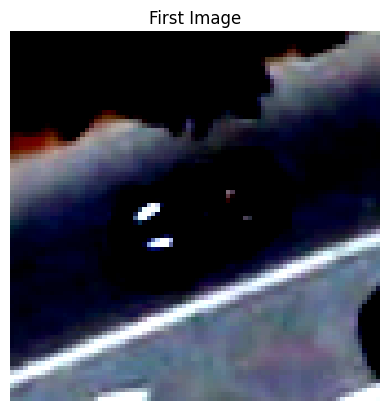

In [9]:
# Visualize first image to check if data is loaded correctly 
## Load first image
first_image, first_label = train_dataset_norm[0]

## Check dimensions 
print("Image shape:", first_image.shape)

## Swap the dimensions (so that matplotlib is able to plot the image)
first_image_rgb = first_image.permute(1, 2, 0)

## Plot first image
plt.imshow(first_image_rgb)
plt.title("First Image")
plt.axis("off") 
plt.show()


In [10]:
first_image.mean([1, 2])

tensor([-0.2467, -0.2526, -0.1332])

In [10]:
# 5. Train the model 
# Train the model within a training routine, using your model and the dataloader class. 
# Run the training with the following settings:
# • 40 epochs
# • Adam-Optimizer ✓
# • Batch-size: 32 ✓
# • Learning-Rate: 0.0001 ✓
# • Cross Entropy loss function ✓
# 5. Train the model
import torch.optim as optim

# Define loss function 
loss_fct = nn.CrossEntropyLoss()  # Cross Entropy loss function

# Define optimizer 
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam-Optimizer with learning rate 0.0001

# Define a function training one epoch 
def train_one_epoch(epoch_idx, model, train_dataloader, loss_fn, optimizer):
    running_loss = 0 
    last_loss = 0 
    
    model.train()  # Set the model to training mode
    
    for i, data in enumerate(train_dataloader):
        inputs, labels = data 
        
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients for every batch!
        optimizer.zero_grad()
        
        # Make predictions for this batch 
        outputs = model(inputs)
        
        # Compute the loss and its gradients 
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        # Adjust learning weights 
        optimizer.step()
        
        # Gather data and report
        running_loss += loss.item()
        if (i + 1) % 50 == 0:  # Print training loss every 50 iterations
            last_loss = running_loss / 50 
            print(f'Batch {i + 1} loss: {last_loss}')
            running_loss = 0.0
        
    # Calculate and return the average loss for each epoch
    avg_loss = running_loss / len(train_dataloader)
    print(f'Epoch {epoch_idx + 1} average loss: {avg_loss}')
    
    return avg_loss, last_loss 


# Training loop 
num_epochs = 40  # Number of epochs 
for epoch in range(num_epochs):
    print(f'Starting epoch {epoch + 1}/{num_epochs}')
    avg_loss, _ = train_one_epoch(epoch, model, train_dataloader_norm, loss_fct, optimizer)
    
# Save the trained model
torch.save(model.state_dict(), 'trained_cust_model.pth')

Starting epoch 1/40
Batch 50 loss: 0.38662198558449745
Batch 100 loss: 0.22404518678784371
Epoch 1 average loss: 0.03525439243425022
Starting epoch 2/40
Batch 50 loss: 0.10452215660363436
Batch 100 loss: 0.09460055831819773
Epoch 2 average loss: 0.02074443524223611
Starting epoch 3/40
Batch 50 loss: 0.05147787269204855
Batch 100 loss: 0.04210544858127832
Epoch 3 average loss: 0.01130991700373477
Starting epoch 4/40
Batch 50 loss: 0.03384065021760762
Batch 100 loss: 0.025139966709539295
Epoch 4 average loss: 0.005909649923330907
Starting epoch 5/40
Batch 50 loss: 0.017148174205794932
Batch 100 loss: 0.018602939657866954
Epoch 5 average loss: 0.0038130851497760777
Starting epoch 6/40
Batch 50 loss: 0.0153073708654847
Batch 100 loss: 0.012972203935496508
Epoch 6 average loss: 0.0022975786246895564
Starting epoch 7/40
Batch 50 loss: 0.009529792132088915
Batch 100 loss: 0.006958052825648337
Epoch 7 average loss: 0.0018911073681065868
Starting epoch 8/40
Batch 50 loss: 0.005612424730788917
B

#
# 2. Predefined Architectures 
1. Load a small network (e.g. MobileNet, SqueezeNet, ResNet18) from the torchvision library. 
2. Train this network according to task 1. 
    * If applied on CPU this might take a while, you can try to reduce the number of epochs to 30. 
    * If the input images do not match the network architecture in size, resize the images to the size the network accepts.

In [11]:
# 1. Train a small network according to task 1
## choosen network: ResNet18

## Load packages 
import torchvision.models as models

resnet18 = models.resnet18()

## Define parameters, loss function and optimizer (not needed if above cells were executed)
num_epochs = 40 # Number of epochs
#loss_fct = nn.CrossEntropyLoss()  # Cross Entropy loss function
#optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adam-Optimizer with learning rate 0.0001

## Create the normalized dataset and dataloader (not needed if above cells were executed)
#train_dataset_norm = CustomDatasetClass(train_dir=train_dir, transform=normalization)
#train_dataloader_norm = DataLoader(train_dataset_norm, batch_size=32, shuffle=True)

## Training loop 
for epoch in range(num_epochs):
    print(f'Starting epoch {epoch + 1}/{num_epochs}')
    avg_loss, _ = train_one_epoch(epoch, resnet18, train_dataloader_norm, loss_fct, optimizer)
    
## Save the trained model
torch.save(resnet18.state_dict(), 'trained_resnet.pth')

Starting epoch 1/40
Batch 50 loss: 6.4668717956542965
Batch 100 loss: 6.462382221221924
Epoch 1 average loss: 1.5663748798948345
Starting epoch 2/40
Batch 50 loss: 6.460469913482666
Batch 100 loss: 6.461147356033325
Epoch 2 average loss: 1.567567203984116
Starting epoch 3/40
Batch 50 loss: 6.462748737335205
Batch 100 loss: 6.4644852638244625
Epoch 3 average loss: 1.5668498169292102
Starting epoch 4/40
Batch 50 loss: 6.456353178024292
Batch 100 loss: 6.467580184936524
Epoch 4 average loss: 1.5667246002139468
Starting epoch 5/40
Batch 50 loss: 6.45986554145813
Batch 100 loss: 6.466407680511475
Epoch 5 average loss: 1.5654364137938528
Starting epoch 6/40
Batch 50 loss: 6.453835210800171
Batch 100 loss: 6.468645000457764
Epoch 6 average loss: 1.5681648579510776
Starting epoch 7/40
Batch 50 loss: 6.462162637710572
Batch 100 loss: 6.462637767791748
Epoch 7 average loss: 1.566032102613738
Starting epoch 8/40
Batch 50 loss: 6.468596019744873
Batch 100 loss: 6.461980524063111
Epoch 8 average lo

#
# 3. Testing 
1. Use the trained models from Tasks 1 and 2 and perform predictions on the test data (.data/test). Note that the raw output of the network is not a classification result. 

<br>

2. From the predicted output, calculate
    - Confusion Matrix
    - Precision
    - Recall
    - F1-Score
    - Overall Accuracy.
    
<br>

3. TorchMetrics (https://lightning.ai/docs/torchmetrics/stable/), Scikit-Learn metrics module (https://scikit-learn.org/stable/index.html)

In [12]:
# 1. Make predictions (https://stackoverflow.com/questions/73396203/how-to-use-trained-pytorch-model-for-prediction), 
# https://stackoverflow.com/questions/66952664/how-do-i-predict-using-a-pytorch-model
## Load packages 
import torchvision.models as models

## Load test data into dataset and dataloader 
test_dataset_norm = CustomDatasetClass(directory=test_dir, transform=normalization)
test_dataloader_norm = DataLoader(test_dataset_norm, batch_size=32, shuffle=True)

## Import the trained models 
trained_resnet = models.resnet18()
trained_resnet.load_state_dict(torch.load('trained_resnet.pth'))

trained_cust_model = CNN_Model(number_of_classes)
trained_cust_model.load_state_dict(torch.load('trained_cust_model.pth'))

## Define function to make the predictions
def predict(self, test_data_loader):
    self.eval() # Enable the evaluation mode to test with new sample
    
    predictions = [] # Initialize empty list to store the results
    
    # Iterate over batches of data from the test data loader
    for batch in test_data_loader:
        img_batch, _ = batch  # Ignore labels in unpacking
        img_batch = img_batch.to(device) # Move image batch to device
        with torch.no_grad(): # Disable gradient calculation to save memory and computation
            pred_batch = model(img_batch) # Pass the image batch through the model to get predictions
        pred_np_batch = pred_batch.cpu().detach().numpy() # Move the predictions to the CPU and convert them to a NumPy array
        predictions.extend(pred_np_batch) # Append the predictions to the list

    return predictions

## Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Move models to device
trained_resnet.to(device)
trained_cust_model.to(device)

### Call function 
cust_model_pred = predict(trained_cust_model, test_dataloader_norm)
trained_resnet_pred = predict(trained_resnet, test_dataloader_norm)

In [13]:
## 2. Calculate metrics 
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import torch.nn.functional as F
from sklearn.metrics import classification_report

# Obtain ground truth labels 
target_values = test_dataset_norm.labels

# Convert predictions to class labels
cust_model_pred_probs = F.softmax(torch.tensor(cust_model_pred), dim=1).numpy()  # Apply softmax to get probabilities
cust_model_pred_labels = np.argmax(cust_model_pred_probs, axis=1)  # Get the class with the highest probability

resnet_pred_probs = F.softmax(torch.tensor(trained_resnet_pred), dim=1).numpy()  # Apply softmax to get probabilities
resnet_pred_labels = np.argmax(resnet_pred_probs, axis=1)  # Get the class with the highest probability

# Calculate metrics 
## Confusion matrix
conf_matrix_cust_model = confusion_matrix(target_values, cust_model_pred_labels)
conf_matrix_resnet = confusion_matrix(target_values, resnet_pred_labels)
print("Confusion Matrix: Customized Model\n", conf_matrix_cust_model)
print("Confusion Matrix: ResNet18\n", conf_matrix_resnet)

## Accuracy
acc_cust_model = accuracy_score(target_values, cust_model_pred_labels)
acc_resnet = accuracy_score(target_values, resnet_pred_labels)
print("Accuracy: Customized Model", acc_cust_model)
print("Accuracy: ResNet18:", acc_resnet)

## Precision, Recall, F1-Score
class_rep_cust_model = classification_report(target_values, cust_model_pred_labels, output_dict=True)
class_rep_resnet = classification_report(target_values, resnet_pred_labels, output_dict=True)
print("Classification report:", class_rep_cust_model)
print("Classification report:", class_rep_resnet)

cust_model_precision =  class_rep_cust_model['macro avg']['precision'] 
cust_model_recall = class_rep_cust_model['macro avg']['recall']    
cust_model_f1 = class_rep_cust_model['macro avg']['f1-score']
print("Customized Model:\n", "Precision:", cust_model_precision, ", Recall:", cust_model_recall, ", F1-Score:", cust_model_f1)

resnet_precision =  class_rep_resnet['macro avg']['precision'] 
resnet_recall = class_rep_resnet['macro avg']['recall']    
resnet_f1 = class_rep_resnet['macro avg']['f1-score']
print("ResNet18:\n", "Precision:", resnet_precision, ", Recall:", resnet_recall, ", F1-Score:", resnet_f1)

Confusion Matrix: Customized Model
 [[112 288]
 [270 676]]
Confusion Matrix: ResNet18
 [[119 281]
 [266 680]]
Accuracy: Customized Model 0.5854383358098069
Accuracy: ResNet18: 0.5936106983655275
Classification report: {'0': {'precision': 0.2931937172774869, 'recall': 0.28, 'f1-score': 0.28644501278772383, 'support': 400.0}, '1': {'precision': 0.7012448132780082, 'recall': 0.7145877378435518, 'f1-score': 0.7078534031413612, 'support': 946.0}, 'accuracy': 0.5854383358098069, 'macro avg': {'precision': 0.49721926527774757, 'recall': 0.4972938689217759, 'f1-score': 0.49714920796454254, 'support': 1346.0}, 'weighted avg': {'precision': 0.5799814860861743, 'recall': 0.5854383358098069, 'f1-score': 0.5826205976870856, 'support': 1346.0}}
Classification report: {'0': {'precision': 0.3090909090909091, 'recall': 0.2975, 'f1-score': 0.30318471337579617, 'support': 400.0}, '1': {'precision': 0.7075962539021852, 'recall': 0.718816067653277, 'f1-score': 0.7131620346093339, 'support': 946.0}, 'accura

C:\Users\marce\AppData\Local\Temp\ipykernel_29660\1868738328.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  cust_model_pred_probs = F.softmax(torch.tensor(cust_model_pred), dim=1).numpy()  # Apply softmax to get probabilities


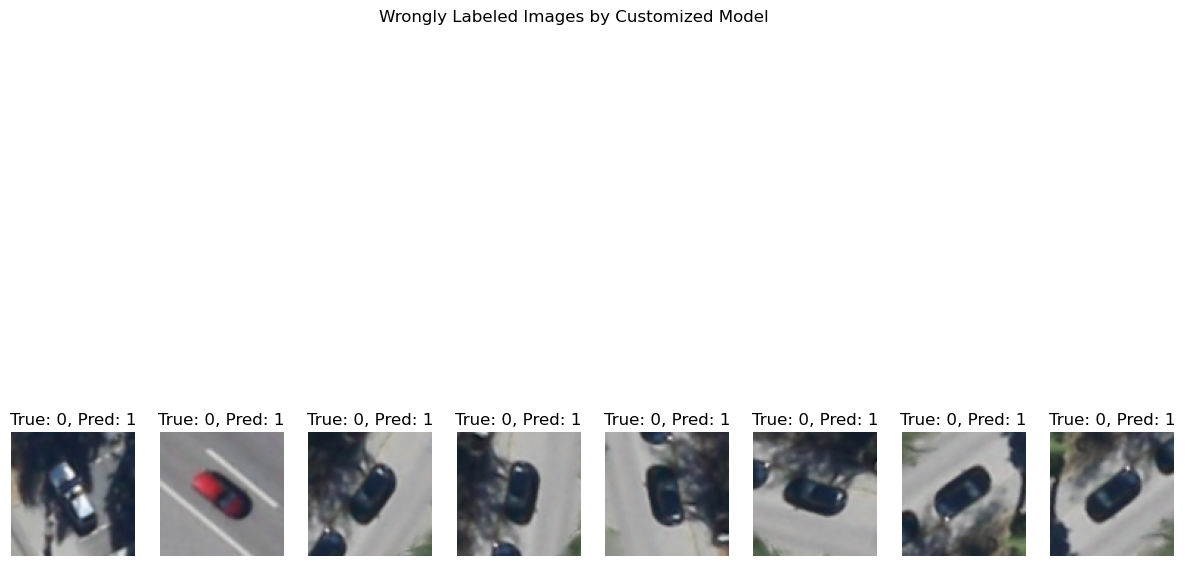

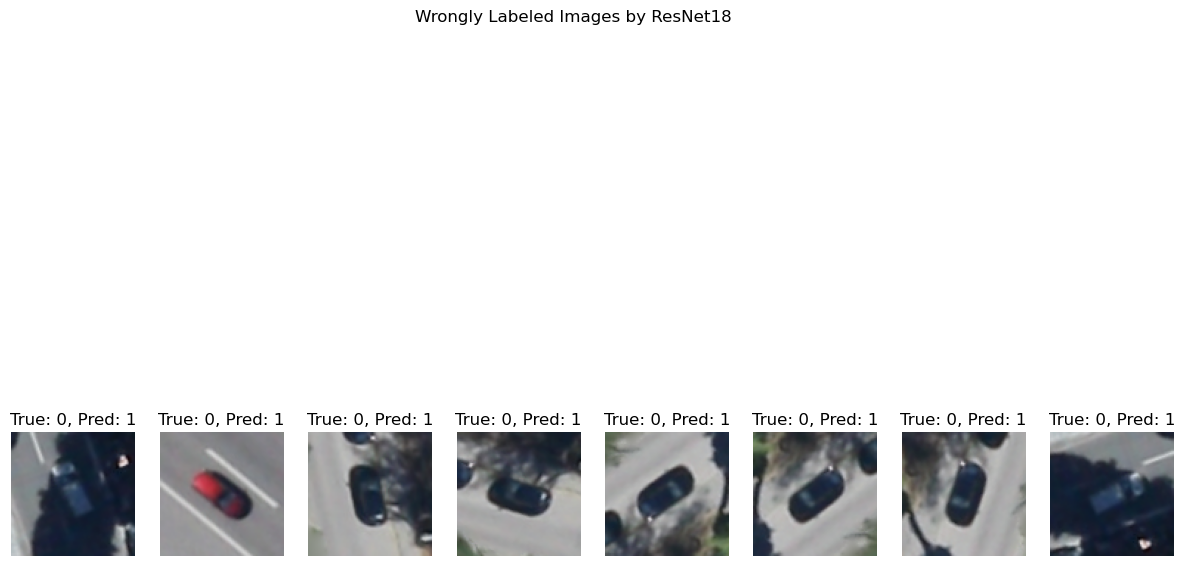

In [9]:
import matplotlib.pyplot as plt

# Step 1: Identify wrongly labeled images
wrong_indices_cust_model = [i for i, (true, pred) in enumerate(zip(target_values, cust_model_pred_labels)) if true != pred]
wrong_indices_resnet = [i for i, (true, pred) in enumerate(zip(target_values, resnet_pred_labels)) if true != pred]

# Step 2: Extract the corresponding image paths and their true and predicted labels
wrong_images_cust_model = [test_dataset_norm.data_samples[i] for i in wrong_indices_cust_model]
wrong_labels_true_cust_model = [target_values[i] for i in wrong_indices_cust_model]
wrong_labels_pred_cust_model = [cust_model_pred_labels[i] for i in wrong_indices_cust_model]

wrong_images_resnet = [test_dataset_norm.data_samples[i] for i in wrong_indices_resnet]
wrong_labels_true_resnet = [target_values[i] for i in wrong_indices_resnet]
wrong_labels_pred_resnet = [resnet_pred_labels[i] for i in wrong_indices_resnet]

# Step 3: Use matplotlib to visualize these images along with their true and predicted labels
def visualize_wrongly_labeled_images(wrong_images, true_labels, pred_labels, model_name, num_images=8):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_images, len(wrong_images))):
        img = io.imread(wrong_images[i])
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_labels[i]}, Pred: {pred_labels[i]}")
        plt.axis('off')
    plt.suptitle(f"Wrongly Labeled Images by {model_name}")
    plt.show()

# Visualize the wrongly labeled images for both models
visualize_wrongly_labeled_images(wrong_images_cust_model, wrong_labels_true_cust_model, wrong_labels_pred_cust_model, "Customized Model")
visualize_wrongly_labeled_images(wrong_images_resnet, wrong_labels_true_resnet, wrong_labels_pred_resnet, "ResNet18")